In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Accuracy,Precision , Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = Sequential()
model.add(Conv2D(16,3,input_shape=(512,512,1),activation= 'relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(8,3,activation= 'relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(4,3,activation= 'relu'))

model.add(Flatten())

model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 4)       292       
                                                                 
 flatten (Flatten)           (None, 61504)             0

In [4]:
X1 = np.load("/kaggle/input/classdata/X1.npy")
X0 = np.load("/kaggle/input/classdata/X0.npy")
Y1 = np.load("/kaggle/input/classdata/Y1.npy")
Y0 = np.load("/kaggle/input/classdata/Y0.npy")

In [5]:
X = np.concatenate((X1,X0),axis=0)
Y = np.concatenate((Y1,Y0),axis=0)

In [6]:
X = X/255

In [7]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.20,random_state=48)

In [8]:
X = 0
Y=0

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001),loss = BinaryCrossentropy(),metrics=["accuracy",Precision(name="precison"),Recall(name="recall")])

In [12]:
hist = model.fit(Xtrain,Ytrain,epochs=100,batch_size=32,validation_data=(Xtest,Ytest))

Epoch 1/100
37/37 [==============================] - 5s 86ms/step - loss: 0.5063 - accuracy: 0.7997 - precison: 0.7997 - recall: 1.0000 - val_loss: 0.4983 - val_accuracy: 0.8062 - val_precison: 0.8062 - val_recall: 1.0000
Epoch 2/100
37/37 [==============================] - 2s 58ms/step - loss: 0.5058 - accuracy: 0.7997 - precison: 0.7997 - recall: 1.0000 - val_loss: 0.4980 - val_accuracy: 0.8062 - val_precison: 0.8062 - val_recall: 1.0000
Epoch 3/100
37/37 [==============================] - 2s 59ms/step - loss: 0.5053 - accuracy: 0.7997 - precison: 0.7997 - recall: 1.0000 - val_loss: 0.4973 - val_accuracy: 0.8062 - val_precison: 0.8062 - val_recall: 1.0000
Epoch 4/100
37/37 [==============================] - 2s 60ms/step - loss: 0.5048 - accuracy: 0.7997 - precison: 0.7997 - recall: 1.0000 - val_loss: 0.4968 - val_accuracy: 0.8062 - val_precison: 0.8062 - val_recall: 1.0000
Epoch 5/100
37/37 [==============================] - 2s 68ms/step - loss: 0.5043 - accuracy: 0.7997 - precison: 

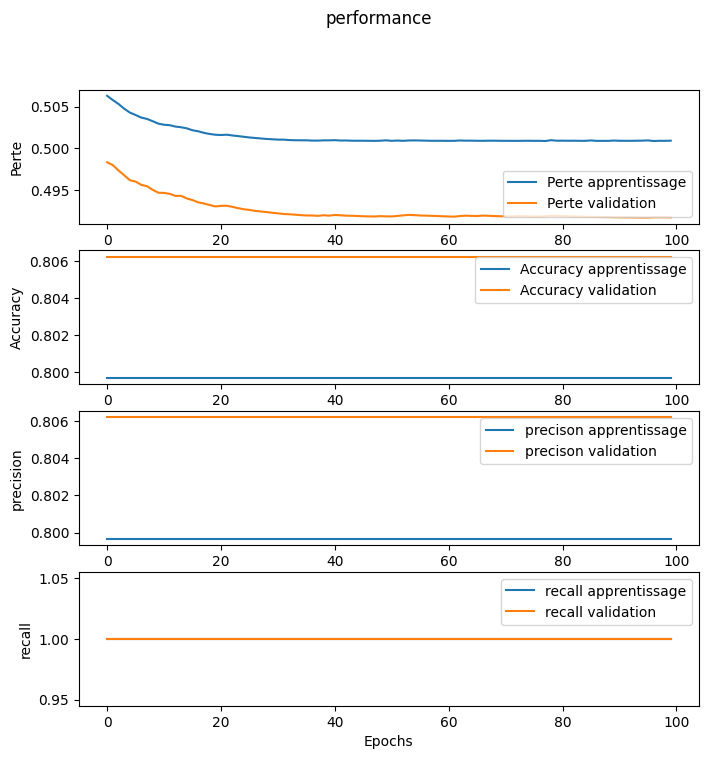

In [15]:
plt.figure(1, figsize=(8, 8))
plt.suptitle("performance") 
plt.subplot(4, 1, 1)
plt.plot(np.arange(0, 100), hist.history["loss"], label="Perte apprentissage")
plt.plot(np.arange(0, 100), hist.history["val_loss"], label="Perte validation")
plt.xlabel("Epochs")
plt.ylabel("Perte")
plt.legend() 
plt.subplot(4, 1, 2)
plt.plot(np.arange(0, 100), hist.history["accuracy"], label="Accuracy apprentissage")
plt.plot(np.arange(0, 100), hist.history["val_accuracy"], label="Accuracy validation") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(np.arange(0, 100), hist.history["precison"], label="precison apprentissage")
plt.plot(np.arange(0, 100), hist.history["val_precison"], label="precison validation") 
plt.xlabel("Epochs") 
plt.ylabel("precision")
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(np.arange(0, 100), hist.history["recall"], label="recall apprentissage")
plt.plot(np.arange(0, 100), hist.history["val_recall"], label="recall validation") 
plt.xlabel("Epochs") 
plt.ylabel("recall")
plt.legend()


In [16]:
model.evaluate(Xtest,Ytest,batch_size=32)

10/10 [==============================] - 0s 29ms/step - loss: 0.4917 - accuracy: 0.8062 - precison: 0.8062 - recall: 1.0000


[0.49171578884124756, 0.8062283992767334, 0.8062283992767334, 1.0]

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(Xtest,batch_size=4)
y_pred = np.where(y_pred>0.5,1.,0.)
cm = confusion_matrix(Ytest,y_pred)

73/73 [==============================] - 1s 4ms/step


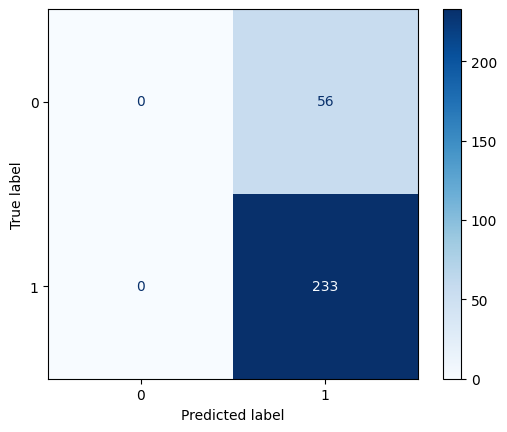

In [18]:

from sklearn.metrics import ConfusionMatrixDisplay
dis = ConfusionMatrixDisplay(cm)
dis.plot(cmap=plt.cm.Blues)
